# Information Retrieval Assignment 3

    Group 3: Sugam Budhraja (2016A7PS0064G), Mukul Jain (2016A7PS0046G), Shriya TP (2016A7PS0060G)

### Importing Libraries

In [1]:
import urllib.request
from html.parser import HTMLParser
from urllib.parse import urlparse
from bs4 import BeautifulSoup
from parsel import Selector
import networkx as nx
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import threading
import pandas as pd
import time
import os
import heapq
from bs4.element import Comment
%matplotlib inline

## Task 1: Web Crawler

### Choosing 5 random seed urls

In [2]:
seed_urls = [
    "https://python.org/",
    "https://www.apple.com/",
    "https://en.wikipedia.org/wiki/Link_analysis",
    "https://www.geeksforgeeks.org/",
    "https://www.coursera.org/"
]

### Fetching html from url

In [3]:
def getDataFromUrl(url):
    try:
        with urllib.request.urlopen(url) as response:
            html = response.read()
        return html
    except:
        return None

In [4]:
raw_html = getDataFromUrl(seed_urls[0]).decode('utf-8')
print(raw_html)

<!doctype html>
<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->
<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->
<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->
<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->

<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">

    <meta name="application-name" content="Python.org">
    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">
    <meta name="apple-mobile-web-app-title" content="Python.org">
    <meta name="apple-mobile-web-app-capable" content="yes">
    <meta name="apple-mobile-web-app-status-bar-style" content="black">

    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <meta name="HandheldFriendly" conte

### Helper functions for processing html file

In [5]:
def getSelector(html):
    selector = Selector(text=html.decode("utf-8"))
    return selector

def getBody(selector):
    pol = selector.css('body').get()
    return pol


def getUrls(selector):
    urls = selector.xpath('//a/@href').getall()
    return urls

def tag_visible(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True

def processQueueElement(url):
    parsedUrl = urlparse(url)
    data = getDataFromUrl(url)
    if data is None:
        return None, None
    selector = getSelector(data)
    body = getBody(selector)
    urls = getUrls(selector)
    visible_texts = filter(tag_visible, BeautifulSoup(data, 'html.parser').findAll(text=True))
    return u" ".join(t.strip() for t in visible_texts), urls

def processUrls(url, urls):
    if urls is None:
        return None, None
    parsedUrl = urlparse(url)
    internal_urls = []
    external_urls = []
    for url in urls:
        if url.startswith("/"):
            internal_urls.append(parsedUrl.scheme+'://'+parsedUrl.netloc+url)
        elif url.startswith("http"):
            external_urls.append(url)
    
    return internal_urls, external_urls

### Creating URL Frontier

In [6]:
URL_frontiers = {}
for url in seed_urls:
    body, urls = processQueueElement(url)
    internal_URL_frontier, external_URL_frontier = processUrls(url, urls)
    URL_frontiers[url] = {'internal':internal_URL_frontier,'external':external_URL_frontier}

In [7]:
URL_frontiers[seed_urls[0]]['external']

['https://docs.python.org',
 'https://pypi.python.org/',
 'https://www.facebook.com/pythonlang?fref=ts',
 'https://twitter.com/ThePSF',
 'http://brochure.getpython.info/',
 'https://docs.python.org/3/license.html',
 'https://wiki.python.org/moin/BeginnersGuide',
 'https://devguide.python.org/',
 'https://docs.python.org/faq/',
 'http://wiki.python.org/moin/Languages',
 'http://python.org/dev/peps/',
 'https://wiki.python.org/moin/PythonBooks',
 'https://wiki.python.org/moin/',
 'http://planetpython.org/',
 'http://pyfound.blogspot.com/',
 'http://pycon.blogspot.com/',
 'https://wiki.python.org/moin/PythonEventsCalendar#Submitting_an_Event',
 'http://docs.python.org/3/tutorial/introduction.html#using-python-as-a-calculator',
 'https://surveys.jetbrains.com/s3/c6-python-developers-survey-2019',
 'https://docs.python.org',
 'https://blog.python.org',
 'http://feedproxy.google.com/~r/PythonSoftwareFoundationNews/~3/jAMRqiPhWSs/seeking-developers-for-paid-contract.html',
 'http://feedproxy.

#### Creating the graph starting from seed URL

In [8]:
graph = nx.DiGraph()
internal_urls, external_urls = processUrls(seed_urls[0], processQueueElement(seed_urls[0])[1]) # getting list of urls of urls of homepage
urls = internal_urls# + external_urls

source_list = []
dest_list = []

for i in urls:
    if not i.startswith("#"):
        graph.add_edge(seed_urls[0],i) # creating a graph of those urls
        source_list.append(seed_urls[0])
        dest_list.append(i)

for i in range(0,10):                            
    try:
        internal_urls, external_urls = processUrls(seed_urls[0], processQueueElement(urls[i])[1])
        urlsx = internal_urls# + external_urls
    except:
        urlsx = []
    for j in urlsx:
        if not j.startswith("#"):
            graph.add_edge(urls[i],j)           
            source_list.append(urls[i])
            dest_list.append(j)

print(graph.number_of_nodes())

232


In [9]:
def create_graph():
    new_graph = nx.DiGraph()
    for i in range(len(source_list)):
        new_graph.add_edge(source[i],dest[i])
    return new_graph

#### Creating the source to target file

In [10]:
nodes = list(graph.nodes)
d = dict()
for i in range(len(nodes)):
    d.update({nodes[i]:i})           # creating a mapping from urls to ids
    
source = []
dest = []
for i in range(len(source_list)):
    source.append(d[source_list[i]])
for i in range(len(dest_list)):
    dest.append(d[dest_list[i]])
    
print(len(source), len(dest))
    
x = pd.DataFrame({'Source':source,'Target':dest})
x.to_csv('file1.csv') 
x.head()

1467 1467


,Source,Target
0,0,0
1,0,1
2,0,2
3,0,3
4,0,0


### Implementation of Mercator URL Frontier Class

In [11]:
def createHeap(urls):
    heap = []
    for url in urls:
        heap.append((time.time(), url))
    heapq.heapify(heap)
    return heap
    
def initializeBackqueues(urls):
    backqueues = {}
    for url in urls:
        backqueues[url] = [url]
    return backqueues

def initializeBlockedtime(urls):
    blockedtimes = {}
    for url in urls:
        blockedtimes[url] = 0
    return blockedtimes

def mercator():
    while (len(visited_urls) < 100):
        url_time, url = heapq.heappop(minheap)
        if url_time > blockedtime[url]:
            updatebackqueue(url)
        else:
            heapq.heappush(minheap, (time.time(), url))
    
def updatebackqueue(url):
    if len(backqueue[url]) > 0:
        url_to_process = backqueue[url].pop(0)
        
        while len(backqueue[url]) > 0 and url_to_process in visited_urls:
            url_to_process = backqueue[url].pop(0)
        
        # checking if url is already processed
        if url_to_process not in visited_urls:
            body, urls = processQueueElement(url_to_process)
            
            if body is not None:
                visited_urls.append(url_to_process)
                internal, external = processUrls(url, urls)
                backqueue[url] += internal + external
                corpora.append(body)
    
    if len(backqueue[url]) > 0:
        heapq.heappush(minheap, (time.time(), url))
        
    blockedtime[url] = time.time() + 2  # 2 seconds wait time


In [12]:
visited_urls = []
corpora = []
minheap = createHeap(seed_urls)
backqueue = initializeBackqueues(seed_urls)
blockedtime = initializeBlockedtime(seed_urls)
mercator()

In [13]:
visited_urls, len(visited_urls)

(['https://en.wikipedia.org/wiki/Link_analysis',
  'https://python.org/',
  'https://www.apple.com/',
  'https://www.coursera.org/',
  'https://www.geeksforgeeks.org/',
  'https://en.wikipedia.org/wiki/Network_theory',
  'https://python.org/psf-landing/',
  'https://www.coursera.org/browse',
  'https://www.geeksforgeeks.org/hire-with-us/',
  'https://en.wikipedia.org/wiki/Data-analysis',
  'https://python.org/jobs/',
  'https://en.wikipedia.org/wiki/Organization',
  'https://www.coursera.org/business',
  'https://practice.geeksforgeeks.org/courses/',
  'https://en.wikipedia.org/wiki/People',
  'https://python.org/community/',
  'https://www.apple.com/mac/',
  'https://en.wikipedia.org/wiki/Financial_transaction',
  'https://www.coursera.org/?authMode=signup',
  'http://www.geeksforgeeks.org/fundamentals-of-algorithms/',
  'https://python.org/psf/donations/',
  'https://en.wikipedia.org/wiki/Fraud_detection',
  'https://www.apple.com/ipad/',
  'https://www.coursera.org/?authMode=login',

## Task 2: Nearly Duplicate Detection

### Data preprocessing

In [14]:
docs = corpora

#### Removing stopwords

In [15]:
from nltk.corpus import stopwords

sw = set(stopwords.words('english'))

def filter_words(word_list):
    useful_words = [w for w in word_list if w not in sw]
    return useful_words

#### Tokenizing documents

In [16]:
tokenized_docs = []
for doc in docs: 
    tokenized_docs.append(filter_words(nltk.word_tokenize(doc)))

In [17]:
unique_tokens_docs = []
for doc in tokenized_docs:
    unique_tokens_docs.append(set(doc))

### Calculating pairwise jaccard similarity

In [18]:
# Size of intersection over size of union
def jaccard(set1, set2):
    return len(set1 & set2) / len(set1 | set2)


In [19]:
# A matrix that stores similarity between each document pair
simiarities = []

for doc1 in unique_tokens_docs:

    doc1_similarities = []

    # Calculating similarity between doc1 and all other docs
    for doc2 in unique_tokens_docs:
        doc1_similarities.append(jaccard(doc1, doc2))

    # Calculated similarities become next row of matrix
    simiarities.append(doc1_similarities)

print(np.matrix(simiarities))

[[1.         0.05998537 0.04278523 ... 0.06612184 0.0440678  0.1586144 ]
 [0.05998537 1.         0.06744868 ... 0.06481481 0.27580071 0.06779661]
 [0.04278523 0.06744868 1.         ... 0.05621302 0.06458333 0.07421875]
 ...
 [0.06612184 0.06481481 0.05621302 ... 1.         0.06033183 0.06916427]
 [0.0440678  0.27580071 0.06458333 ... 0.06033183 1.         0.06521739]
 [0.1586144  0.06779661 0.07421875 ... 0.06916427 0.06521739 1.        ]]


### Plotting heatmap of similarities

In [20]:
def plot_heatmap(corr):

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(100, 75))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap='PuRd', annot=True, vmin=0, vmax=1,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    

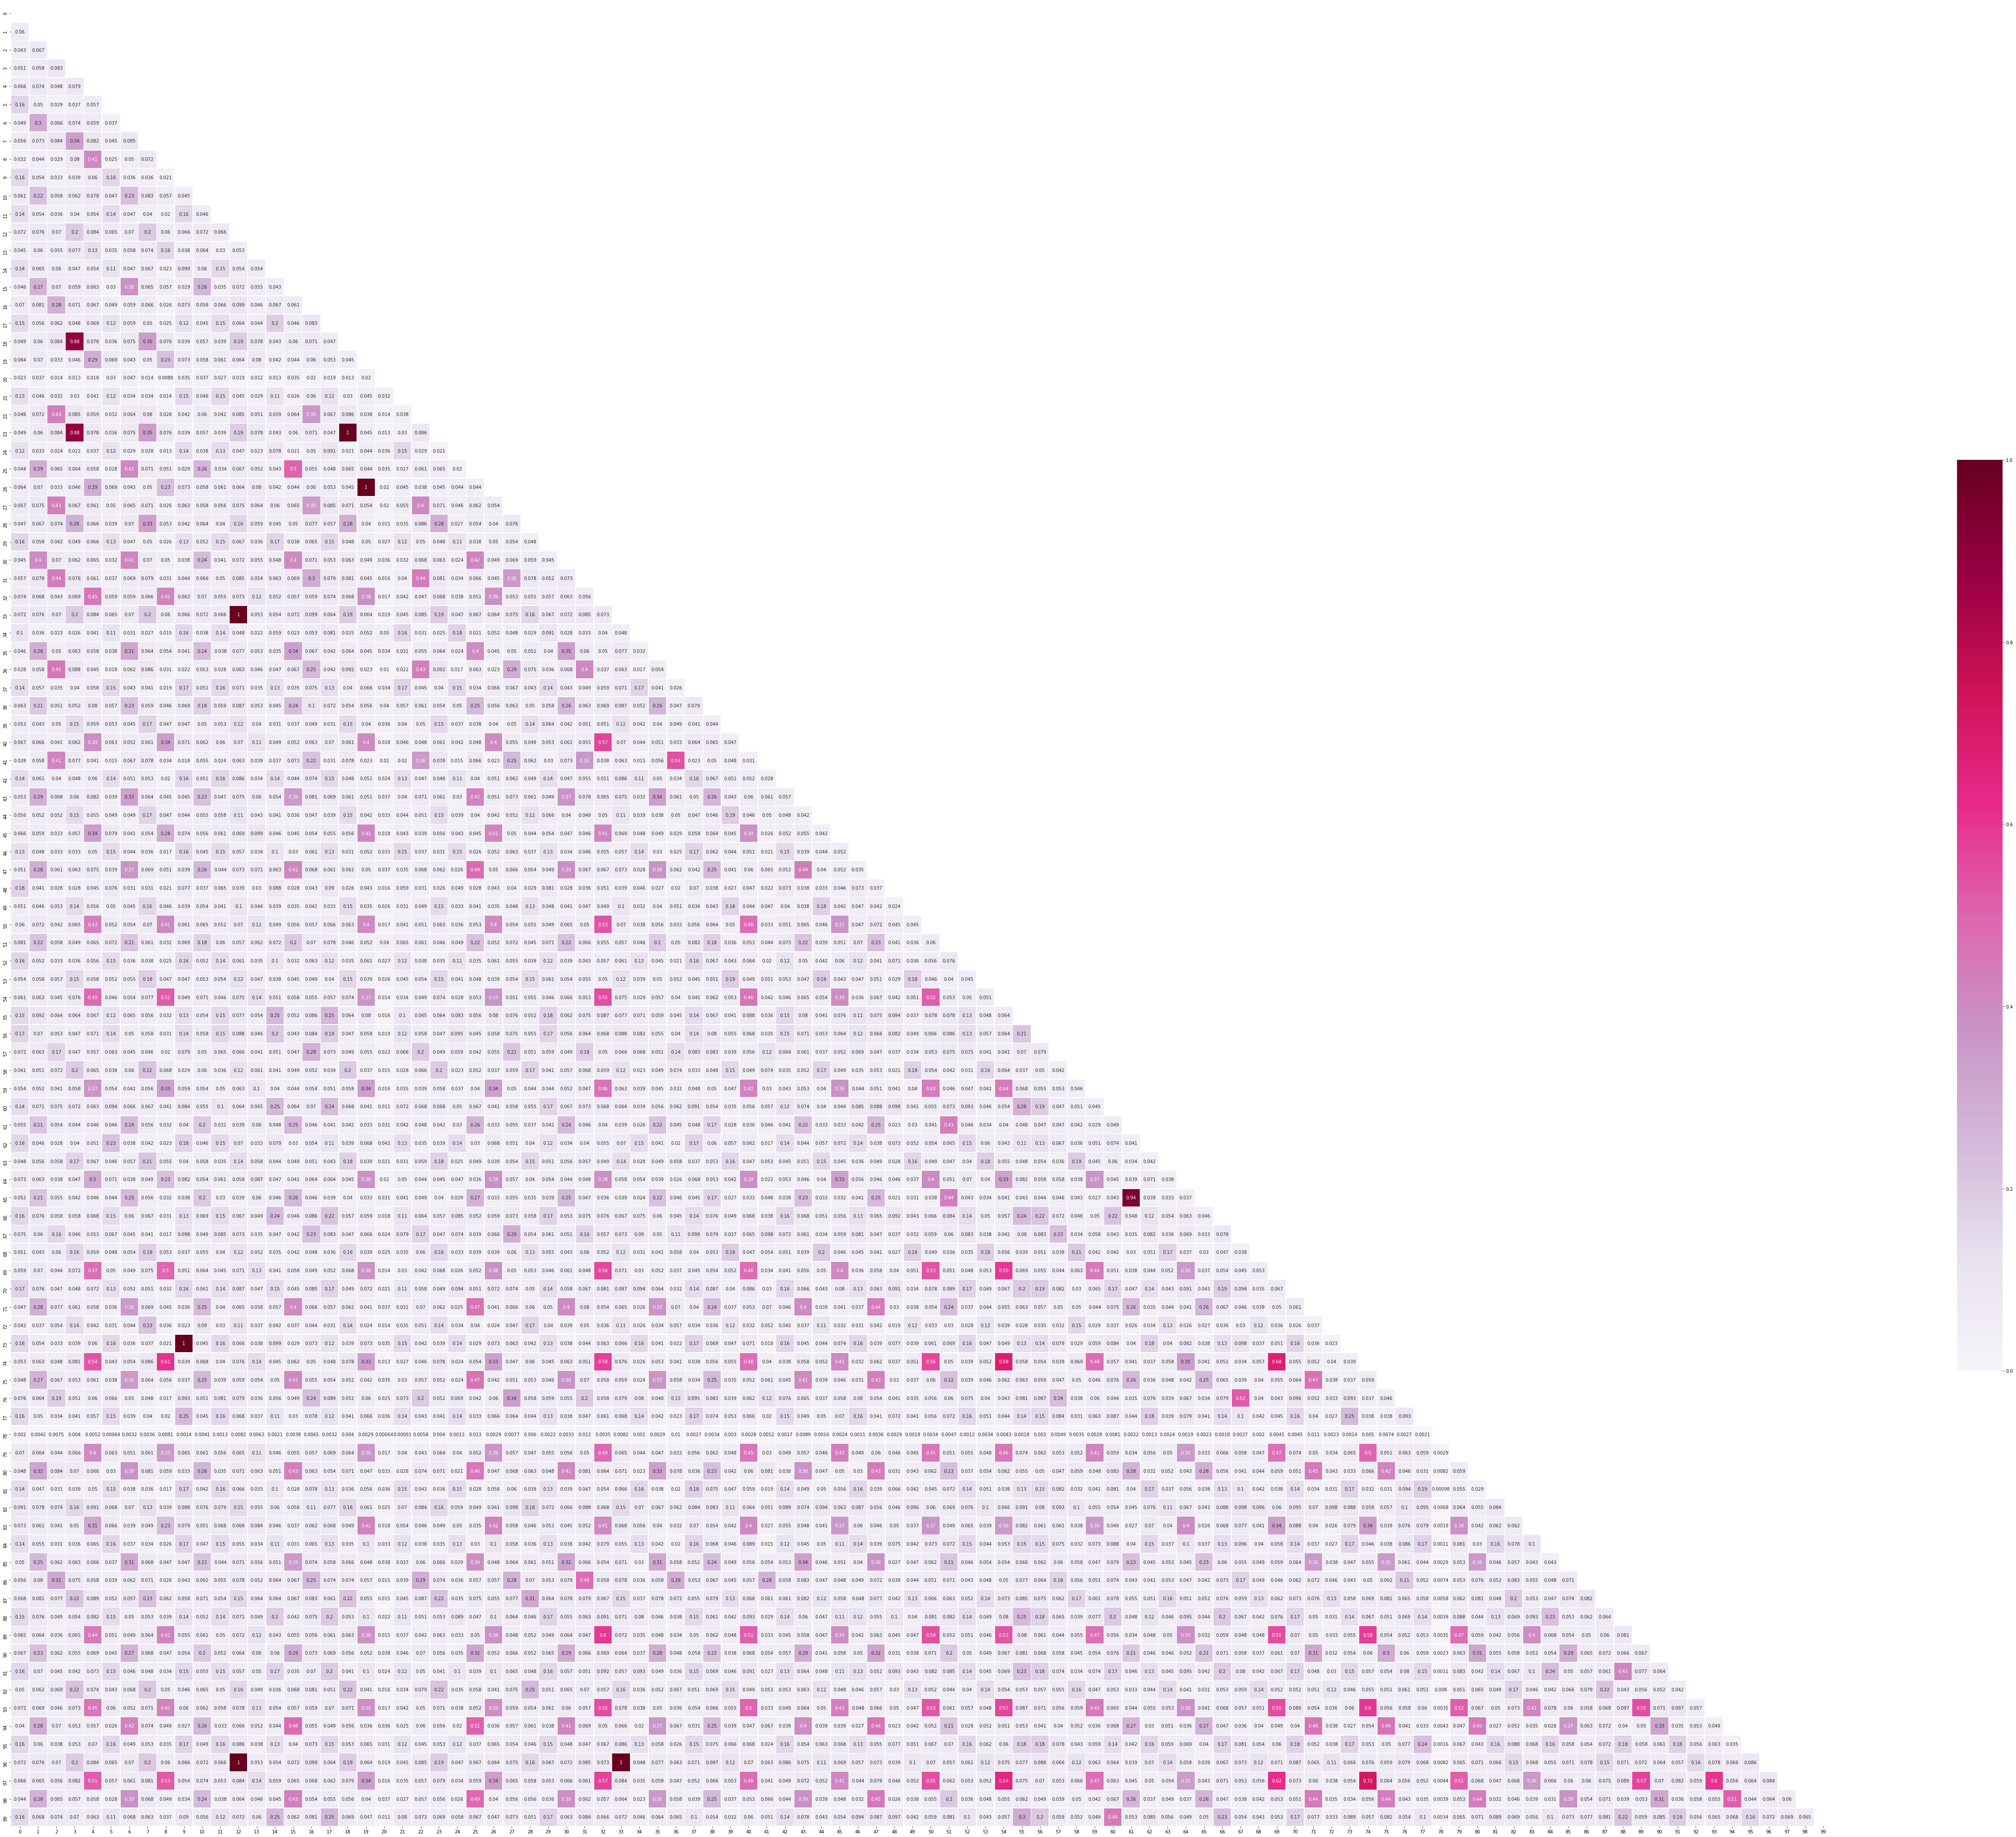

In [21]:
plot_heatmap(simiarities)

### Creating Document vectors

#### Finding all unique words in the documents

In [22]:
unique_words = set([])
for tokens in unique_tokens_docs:
    unique_words |= tokens

#### Creating vectors in required format
Each document is a boolean vector of terms where 1 represents the presence of a term in the document and 0 represents the absence of a term. Rows are unique terms and columns are document vectors.

In [23]:
doc_vectors = []
for word in unique_words:
    vector = []
    for tokens in unique_tokens_docs:
        if word in tokens:
            vector.append(1)
        else:
            vector.append(0)
    doc_vectors.append(vector)
print(np.asarray(doc_vectors))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Calculating signatures

In [24]:
from random import shuffle

signatures = []

no_of_docs = len(unique_tokens_docs)
no_of_words = len(unique_words)

for _ in range(20):
    # Initializing vector that will store signature
    vector = [0]*no_of_docs
    
    # New permutation of rows
    shuffle(doc_vectors)

    # Assigning row ID to each document
    for i in range(no_of_docs):
        for j in range(no_of_words):
            if doc_vectors[j][i] == 1:
                vector[i] = j
                break
    
    signatures.append(vector)
    
print(np.asarray(signatures))

[[  4 391 236 ...   4 404   7]
 [  4 187 148 ...  13 233  13]
 [ 32  32  16 ...  30  41  32]
 ...
 [  4  10  12 ...  21  21  29]
 [ 11  42 171 ...   7  17  11]
 [  1  19  74 ... 158  60 107]]


### Calculating jaccard similarity on signatures

In [25]:
def jaccard_vectors(vec1, vec2):
    # vectors should have same length
    if len(vec1)!=len(vec2):
        return 0
    
    # size of intersection divided by size of union
    n = len(vec1)
    return sum([vec1[i]==vec2[i] for i in range(n)])/n


In [26]:
# Storing transpose of signatures
doc_signatures = np.asarray(signatures).T.tolist()
doc_signatures

[[4, 4, 32, 26, 0, 20, 17, 9, 12, 17, 4, 19, 5, 62, 18, 13, 12, 4, 11, 1],
 [391,
  187,
  32,
  97,
  14,
  9,
  0,
  9,
  51,
  19,
  70,
  31,
  129,
  68,
  33,
  26,
  49,
  10,
  42,
  19],
 [236,
  148,
  16,
  113,
  26,
  148,
  74,
  9,
  119,
  79,
  242,
  183,
  160,
  73,
  949,
  225,
  148,
  12,
  171,
  74],
 [237,
  111,
  32,
  46,
  17,
  28,
  71,
  49,
  229,
  78,
  255,
  87,
  89,
  36,
  146,
  225,
  66,
  4,
  45,
  79],
 [20, 13, 30, 44, 82, 125, 11, 9, 3, 51, 94, 22, 1, 56, 18, 28, 99, 21, 7, 65],
 [4, 1, 21, 10, 0, 29, 21, 9, 1, 17, 3, 11, 5, 6, 18, 12, 53, 5, 11, 1],
 [61,
  165,
  41,
  112,
  63,
  204,
  71,
  9,
  64,
  97,
  70,
  31,
  277,
  68,
  33,
  225,
  66,
  21,
  8,
  15],
 [131,
  111,
  32,
  101,
  84,
  44,
  71,
  9,
  213,
  78,
  217,
  87,
  94,
  36,
  26,
  225,
  66,
  4,
  112,
  33],
 [20,
  70,
  133,
  44,
  167,
  176,
  88,
  49,
  117,
  176,
  165,
  380,
  65,
  56,
  91,
  109,
  99,
  60,
  95,
  158],
 [4, 3, 21, 2

In [27]:
# A matrix that stores similarity between each document pair
signature_simiarities = []

for sign1 in doc_signatures:

    sign1_similarities = []

    #Calculating similarity between sign1 and all other signatures
    for sign2 in doc_signatures:
        sign1_similarities.append(jaccard_vectors(sign1, sign2))

    # Calculated similarities become next row of matrix
    signature_simiarities.append(sign1_similarities)

print(np.matrix(signature_simiarities))

[[1.   0.1  0.05 ... 0.15 0.05 0.15]
 [0.1  1.   0.05 ... 0.05 0.3  0.05]
 [0.05 0.05 1.   ... 0.05 0.15 0.  ]
 ...
 [0.15 0.05 0.05 ... 1.   0.1  0.05]
 [0.05 0.3  0.15 ... 0.1  1.   0.  ]
 [0.15 0.05 0.   ... 0.05 0.   1.  ]]


### Plotting heatmap of jaccard similarity on signatures 

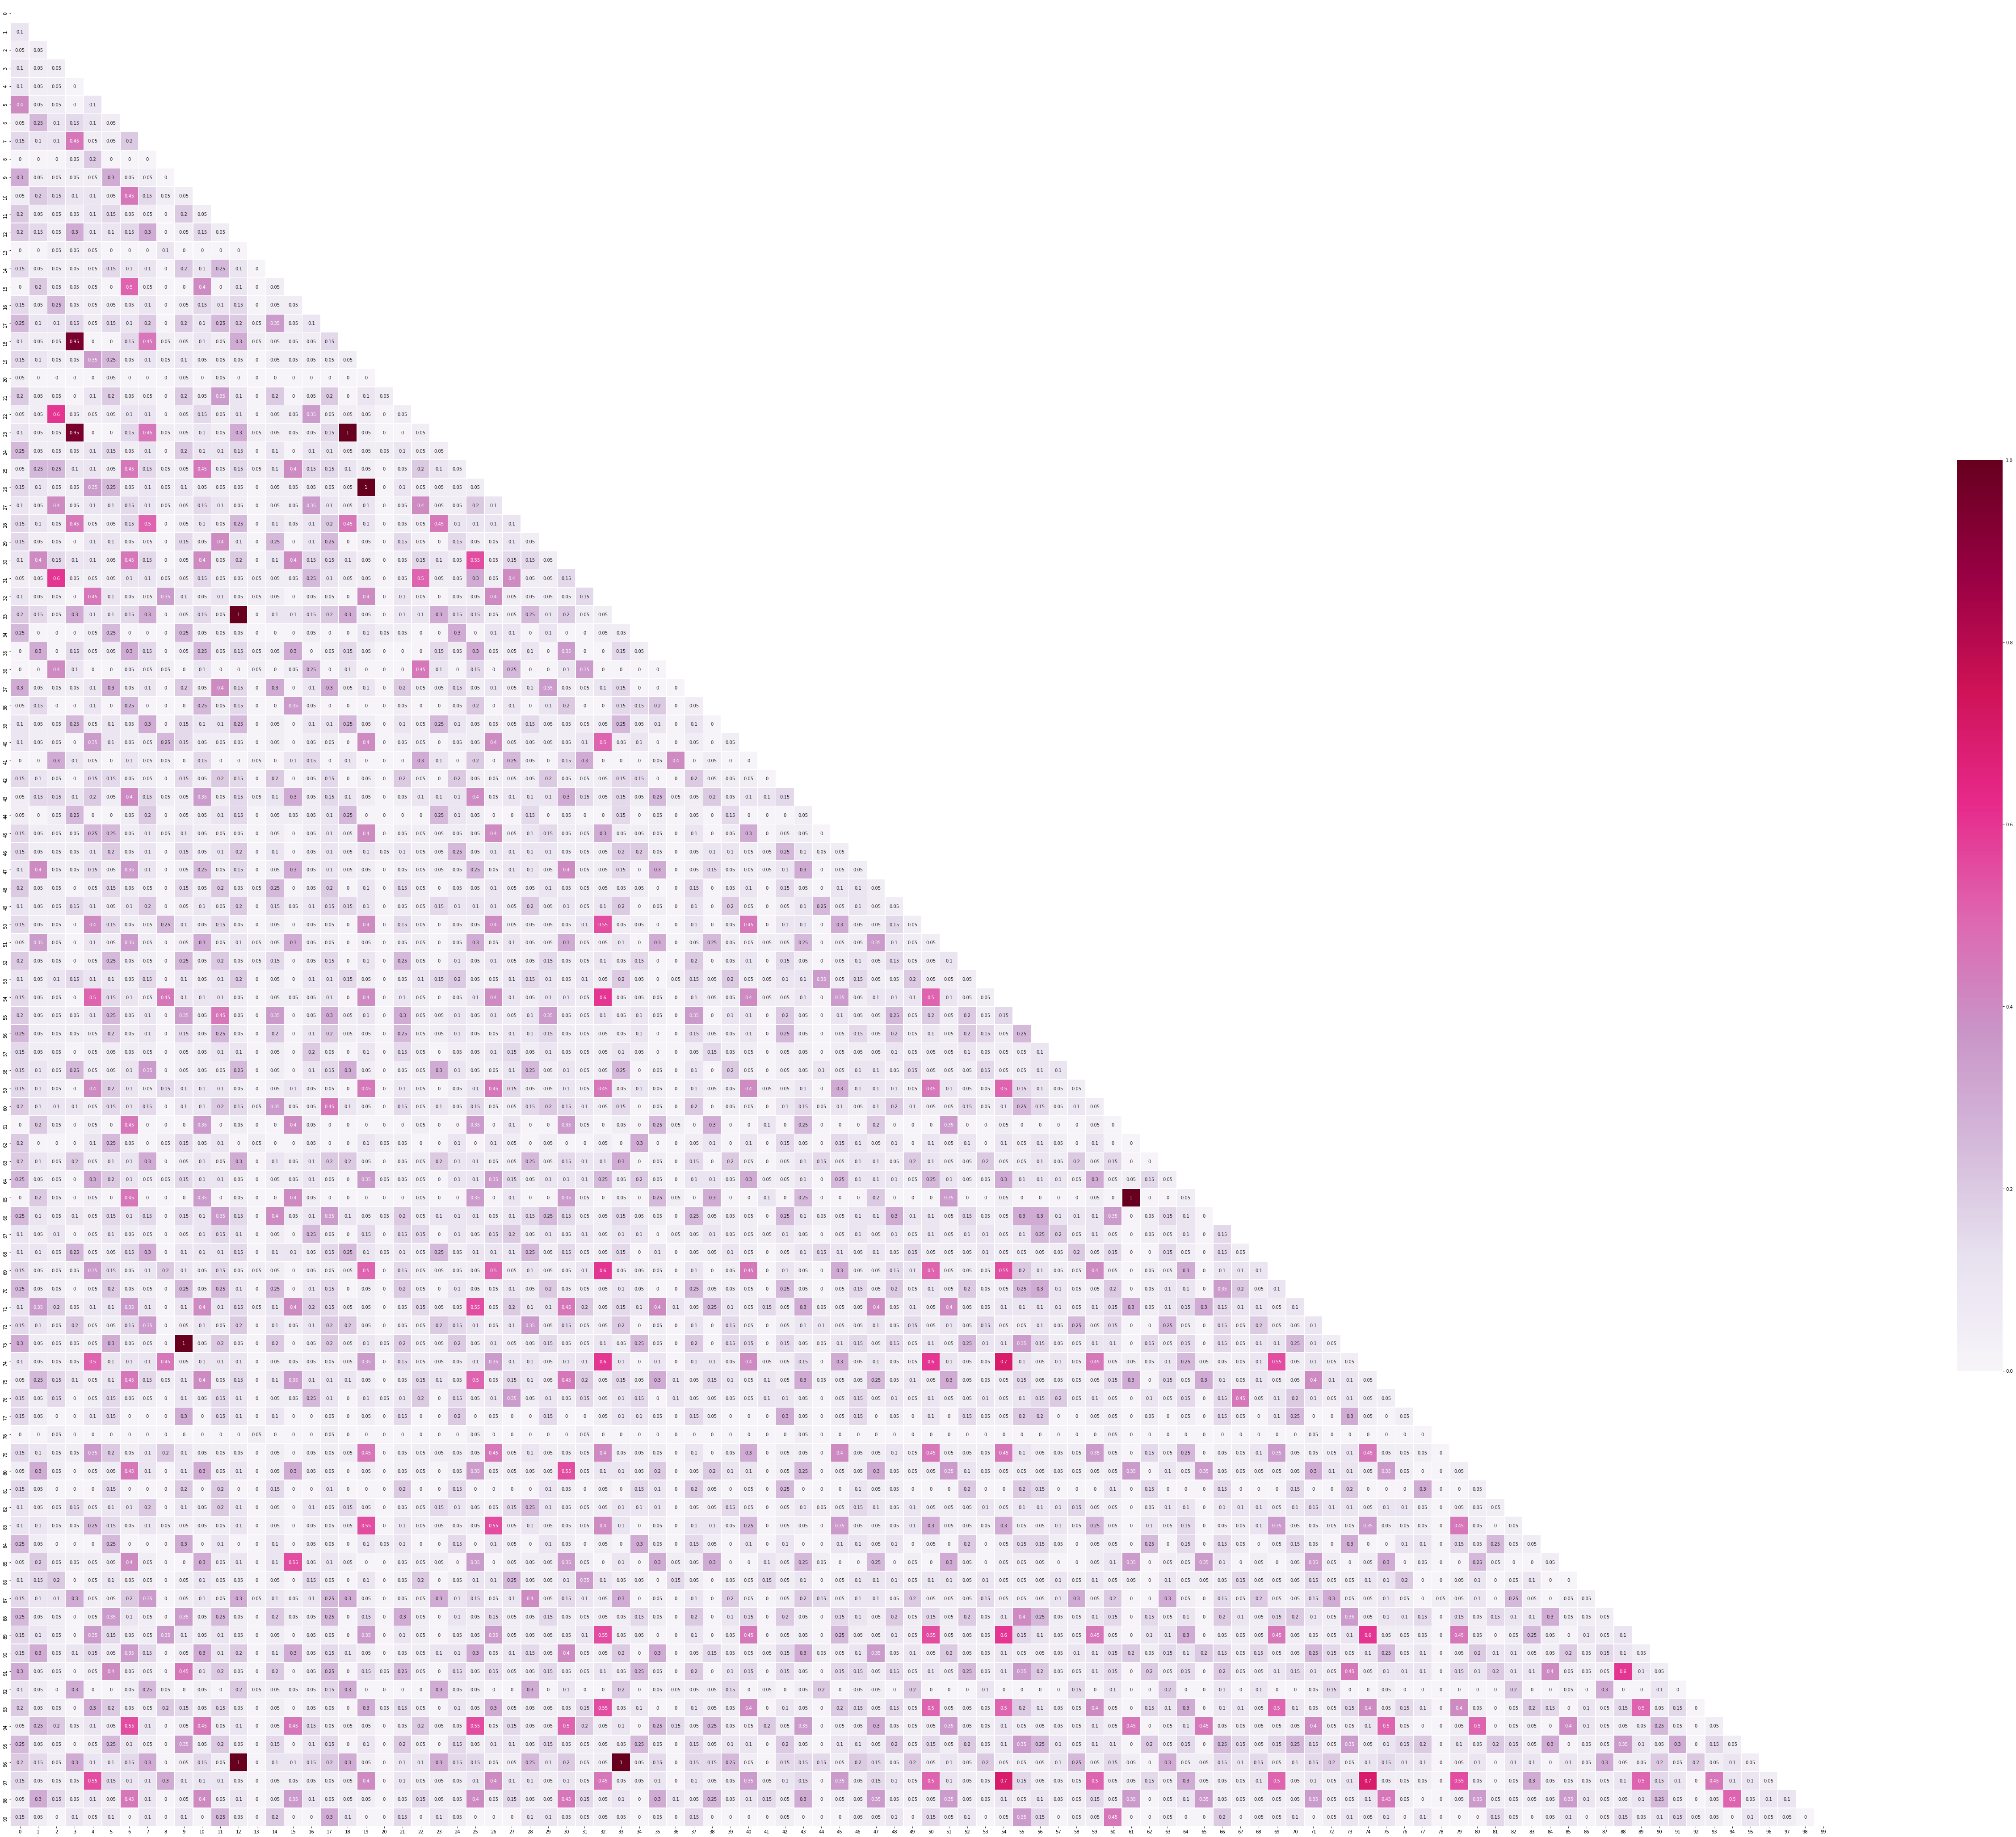

In [28]:
plot_heatmap(signature_simiarities)

## Task 3: Link Analysis

#### Pagerank according to number of incoming links

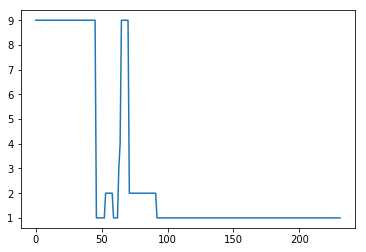

In [29]:
# graph_a = create_graph()
graph_a = graph.copy()
nodes_a = list(graph_a.nodes)
pr_a = []

def q3_a(node, visited):
    visited.add(node)
    result = 1
    innodes = graph_a.in_edges(node)
    return len(innodes)

# calculating page ranks for all the urls in the list
for i in nodes_a:
    visited = {-1}
    pr_a.append(q3_a(i,visited))
    

labels = dict()
for i in range(len(nodes_a)):
    labels.update({nodes_a[i]: pr_a[i]})

xaxis = [i for i in range(len(nodes_a))]
plt.plot(xaxis, pr_a)    # plot of webpage versus pagerank
plt.show()

#### Using iterative pagerank method

In [30]:
# graph_b = create_graph()
graph_b = graph.copy()
nodes_b = list(graph_b.nodes)

init_val = 1.0/len(nodes_b)
pr_b = {}
for i in range(len(nodes_b)):
    pr_b.update( {nodes_b[i]:init_val} )

def q3_b(node,visited):
    visited.add(node)
    result = 1
    innodes = graph_b.in_edges(node)
    if len(innodes)==1:
        return 1
    for i in innodes:
        if i[0]!=node and i[0] not in visited:
            pgrnk = pr_b[ i[0] ]
            odeg = graph_b.out_degree(i[0])
            result+=float(pgrnk/odeg)
    pr_b[node]=result

for i in range(3):   #for 3 iterations
    for j in nodes_b:
        visited = {-1}
        q3_b(j,visited)

#### Recomputing page rank after discarding nodes with outdegree 0

In [31]:
# graph_c = create_graph()
graph_c = graph.copy()

removed = []
for i in nodes_b:
    if(graph_c.out_degree(i)==0):
        graph_c.remove_node(i)
        removed.append(i)
        
nodes_c = list(graph_c.nodes)
        
init_val = 1.0/len(nodes_c)
pr_c = {}
for i in range(len(nodes_c)):
    pr_c.update( {nodes_c[i]:init_val} )
    
def q3_c(node,visited):
    visited.add(node)
    result = 1
    innodes = graph_c.in_edges(node)
    if len(innodes)==1:
        return 1
    for i in innodes:
        if i[0]!=node and i[0] not in visited:
            pgrnk = pr_c[ i[0] ]
            odeg = graph_c.out_degree(i[0])
            result+=float(pgrnk/odeg)
    pr_c[node]=result

for i in range(3):   #for 3 iterations
    for j in nodes_c:
        visited = {-1}
        q3_c(j,visited)

#### Comparing 3(b) and 3(c)

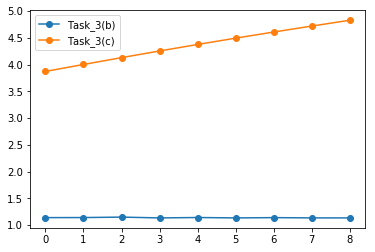

In [32]:
xaxis = [i for i in range(len(nodes_c))] 

pageranks_3b = []
pageranks_3c = []
for i in nodes_c:
    pageranks_3b.append(pr_b[i])
    pageranks_3c.append(pr_c[i])

plt.plot(xaxis, pageranks_3b, marker='o')
plt.plot(xaxis, pageranks_3c, marker='o')
plt.legend(['Task_3(b)', 'Task_3(c)'], loc='upper left')
plt.show()

The most significant changes in page ranks are for nodes 0, 2, and 3. As seen from the plot below, these are the nodes having the highest number of incoming edges, i.e. 5 and 4. Hence, their pagerank gets affected most on removal of the nodes with out-degree 0 as the contributions of the incoming edges changes significantly. However, node 0 has 5 incoming edges and is connected to both 2 and 3, which are high quality links. So, the change for node 0 is higher than that for nodes 2 and 3.

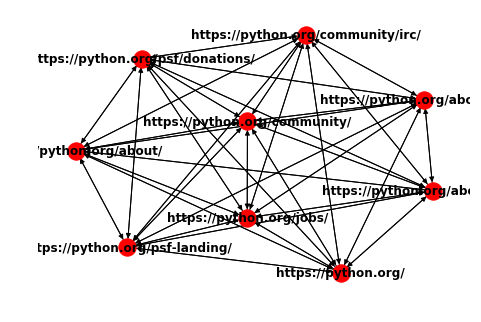

In [33]:
nx.draw(graph_c, with_labels=True, font_weight='bold')
plt.show()

In [34]:
# graph = create_graph()

#### Matrix multiplication method for pagerank

In [35]:
import scipy as sp

# graph_e = create_graph()
graph_e = graph.copy()
nodes_e = list(graph_e.nodes)

A = nx.adjacency_matrix(graph_e)
B = A.todense()

init_val = 1.0/len(nodes_e)
q3_e = [init_val for i in range(len(nodes_e))]

for i in range(len(B)):
    row_sum = np.sum(B[i])
    for j in range(len(B[0])):
        B[i][j] = 1.0/row_sum             # assigning probability values

q3_e = np.transpose(q3_e)
q3_e = q3_e.reshape((q3_e.shape[0],1))

for i in range(3):
    q3_e=np.matmul(B,q3_e)
    
q3_e = np.array(q3_e.T)[0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


#### Removing nodes with no outgoing edges

In [36]:
# graph_f = create_graph()
graph_f = graph.copy()

removed = []
for i in nodes_e:
    if(graph_f.out_degree(i)==0):
        graph_f.remove_node(i)
        removed.append(i)
        
nodes_f = list(graph_f.nodes)

A = nx.adjacency_matrix(graph_f)
B = A.todense()

init_val = 1.0/len(nodes_f)
q3_f = [init_val for i in range(len(nodes_f))]

for i in range(len(B)):
    row_sum = np.sum(B[i])
    for j in range(len(B[0])):
        B[i][j] = 1.0/row_sum             # assigning probability values

q3_f = np.transpose(q3_f)
q3_f = q3_f.reshape((q3_f.shape[0],1))

for i in range(3):
    q3_f = np.matmul(B,q3_f)
    
q3_f = np.array(q3_f.T)[0]

#### Comparing 3(e) and 3(f)

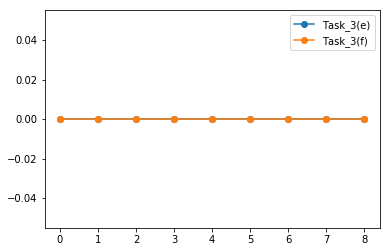

In [37]:
xaxis = [i for i in range(len(nodes_f))] 
pageranks_3e = []
pageranks_3f = []
for i in range(len(nodes_f)):
    pageranks_3f.append(q3_f[i])
    for j in range(len(nodes_e)):
        if(nodes_e[j]==nodes_f[i]):
            pageranks_3e.append(q3_e[j])

plt.plot(xaxis, pageranks_3e, marker='o')
plt.plot(xaxis, pageranks_3f, marker='o')
plt.legend(['Task_3(e)', 'Task_3(f)'], loc='upper right')
plt.show()

The page rank values change the most for nodes 2 and 3. As seen from the plot below, they have the highest number of incoming edges i.e. 4. Even though node 0 also has 4 incoming edges, its links are with comparitively lower rank nodes whose contribution doesn't change much. But nodes 2 and 3 are connected to high quality links, whose contribution to their pageranks increases significantly on removal of the out-degree 0 nodes. So, their page ranks vary the most.

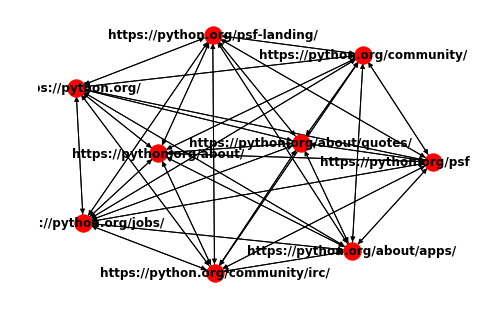

In [38]:
nx.draw(graph_f, with_labels=True, font_weight='bold')
plt.show()